# Homework 1: due date 8th March

1. Create an axon simulation with the following specifications:

- Diameter (diam) = 1 um 
- length (L) = 1000 um 
- Capacitance per area (cm) = 1 uF/cm2
- Passive mechanism (pas) with the conductance per area = 1×10 −4 S/cm2. (Hint: the conductance variable for this mechanism is axon.g_pas)
- A current clamp electrode (ic) near one end (x≈0) that injects 50 pA for a sufficiently long time (>200 ms).

**Questions**: 

2. What are the theoretical membrane time constant (τ) and space constant (λ)?

3. Run the simulation and measure the membrane time constant from the simulated data. How does the measured time constant compare with the theoretical value?

4. What is the electrotonic length of this axon?

5. Change the length (L) and plot the voltage attenuation curve in Fig. 2.4 in the textbook. Note that the unconnected cylinder ends in NEURON are sealed, and you will reproduce the "Sealed end" case. Discuss implications in membrane potential dynamics in short versus long dendrites.

Plot the sealed end case of Fig. 2.5 in the textbook by following the steps below.

6. (I-V curve) Try a few different values for the injected current from -50 pA to 50 pA, record the steady state membrane voltages, and plot the current vs membrane voltage graph. What is the input resistance?
7. (Fig. 2.5) Draw the cable length curve versus input resistance curve as Fig. 2.5 in the textbook. Please make sure that the cable has the sufficiently large nseg to get a quasi-smooth curve. Again, you should be able to get only one curves since cables in NEURON have sealed-ends.
8. (Fig. 2.8B) Set the length sufficiently long and plot how the voltage changes in time during current injection at different locations as in Fig. 2.8B.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

In [2]:
axon = h.Section(name="axon")
axon.diam = 1
axon.L = 1000
axon.insert("pas")
axon.g_pas = 0.0001
axon.nseg = 100
h.psection()

axon { nseg=100  L=1000  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert pas { g_pas=0.0001 e_pas=-70}
	insert capacitance { cm=1}
	insert morphology { diam=1}
}


1.0

In [3]:
ic = h.IClamp(axon(0))
ic.delay = 0
ic.dur = 300
ic.amp = 0.05
ic

IClamp[0]

In [4]:
def run_and_record():
  dt = 0.1
  xs = [0.001, 0.5, 1]
  recs = []
  for x in xs:
    v = h.Vector()
    v.record(axon(x)._ref_v, dt)
    recs.append(v)
   
  h.init()
  h.run()
  return(recs)

In [5]:
ic.amp = 0.05
h.tstop = 100
recs = run_and_record()

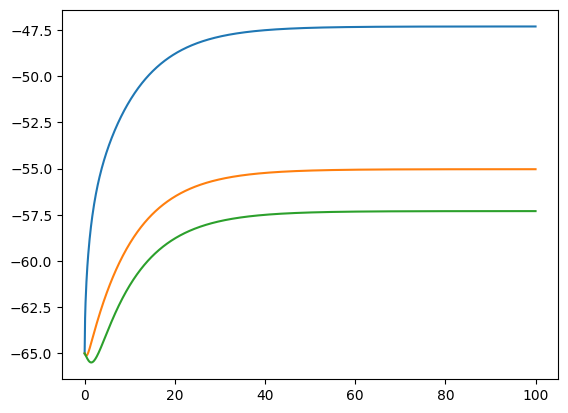

In [6]:
t = np.linspace(0, h.tstop, num=len(recs[0]))
fig, ax = plt.subplots()

ax.plot(t, recs[0], t, recs[1], t, recs[2])